**Η εργασία έγινε στο Google Colab απο τον Μάριο Κερασιώτη ΑΜ: 03117890**

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αναγνώριση ψηφίων από εικόνα στο dataset MNIST. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα pixels της κάθε εικόνας και $y_i$ είναι η ετικέτα της εικόνας - ένας ακέραιος στο $[0,9]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,9]}$$

## 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα υλοποιηθούν στα επόμενα μέρη.

## 2ο Μέρος: ΚΝΝ
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται μια "φρέσκια" εικόνα ως διάνυσμα από pixels $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστιχεί στα pixels μιας εικόνας από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στις 100 πρώτες εικόνες του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 1ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

## 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean, δηλαδή παίρνουν δύο τιμές
  - Για το συγκεκριμένο πρόβλημα μπορούμε να στρογγυλοποιήσουμε τις τιμές των pixels από το $[0.0,1.0]\rightarrow{\{0,1\}}$
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηρστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

## 4ο Μέρος: Perceptron

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τις εικόνες του mnist σε μια από τις 10 διαφορετικές κλάσεις (από 0 μέχρι 9). Αρχικά θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου.  

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x)είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδος του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε σε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

# 1ο Μέρος: Αξιολόγηση

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές στη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong) και υπολογίζει και τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένα}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self,y_true,y_pred,x):
      self.y_true = y_true
      self.y_pred = y_pred
      self.x = x

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      acc = [x == y for x, y in zip(y_true, y_pred)].count(True) / len(y_true)
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision" : precision, "recall": recall, "f1": f1,"accuracy":self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_sample_of_wrong(self, rows = 5, lines = 4):
        wrong_indexes = [index for index in range(len(self.y_true)) if self.y_true[index] != self.y_pred[index]]
        plt.figure(figsize=(10, 10))

        random.shuffle(wrong_indexes)
        for i, index in enumerate(wrong_indexes[: rows*lines]):
            plt.subplot(rows, lines, i + 1)
            image = self.x[index]
            plt.imshow(image.reshape((28, 28)))
            plt.title("Real: {}, Pred: {}".format(self.y_true[index], self.y_pred[index]))
            plt.axis('off')

    def get_evaluation_report(self):
       metrics = self.get_metrics()
       for m in metrics:
         print(m+' : '+str(metrics[m]))
       cm = self.confusion_matrix()
       print("Confusion matrix: ")
       print(cm)
       print("Some images with wrong predictions")
       self.get_sample_of_wrong()

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν οι εικόνες από το dataset

precision : 0.7000000000000001
recall : 0.6944444444444443
f1 : 0.6888888888888888
accuracy : 0.625
Confusion matrix: 
[[3 1 0]
 [2 1 0]
 [0 0 1]]
Some images with wrong predictions


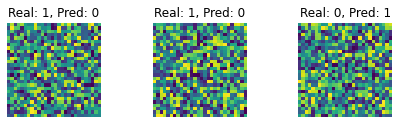

In [ ]:
y_true = [1,0,2,0,0,1,1,0]
y_pred = [0,0,2,0,1,1,0,0]
x = np.random.rand(8,28*28)

eval = Evaluate(y_true,y_pred,x)
eval.get_evaluation_report()

# Dataset

To MNIST είναι από τα πιο διαδεδομένα σύνολα δεδομένων στη μηχανική μάθηση. Για όσους δουλεύουν στο Google Colab, το κελί που ακολουθεί φορτώνει τα δεδομένα εκπαίδευσης σε έναν πίνακα x_train με τις ετικέτες των δεδομένων στη λίστα y_train, και τα testing δεδομένα αντίστοιχα στα x_test και y_test.


Για όσους δεν δουλεύουν στο colab μπορούν να αντικαταστήσουν τις δύο πρώτες γραμμές του κελιού (train_dset = ... και test_dset = ... ) με τον παρακάτω κώδικα:
```
mnist_dataframe = pd.read_csv(
  "https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv",
  sep=",",
  header=None)
mnist_dataframe = mnist_dataframe.head(10000)

mnist_dataframe = mnist_dataframe.reindex(np.random.permutation(mnist_dataframe.index))
train_dset = mnist_dataframe[:7500]
test_dset = mnist_dataframe[7500:10000]
```

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_dset = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
test_dset = pd.read_csv('/content/sample_data/mnist_test.csv',header=None)
## From https://colab.research.google.com/notebooks/mlcc/multi-class_classification_of_handwritten_digits.ipynb#scrollTo=JfFWWvMWDFrR
def parse_labels_and_features(dataset):
  """Extracts labels and features.
  
  This is a good place to scale or transform the features if needed.
  
  Args:
    dataset: A Pandas `Dataframe`, containing the label on the first column and
      monochrome pixel values on the remaining columns, in row major order.
  Returns:
    A `tuple` `(labels, features)`:
      labels: A Pandas `Series`.
      features: A Pandas `DataFrame`.
  """
  labels = dataset[0]

  # DataFrame.loc index ranges are inclusive at both ends.
  features = dataset.loc[:,1:784]
  # Scale the data to [0, 1] by dividing out the max value, 255.
  features = features / 255

  return labels, np.array(features)

def show_image(features):
  img = features.reshape((28,28))
  plt.imshow(img)
  plt.show()

y_train,x_train = parse_labels_and_features(train_dset)
y_test,x_test = parse_labels_and_features(test_dset)

Ποια είναι η μορφή των δεδομένων για μια εικόνα;

In [ ]:
print("Shape of an image: "+str(x_train[0].shape))
print("Max value of pixel: "+str(np.max(x_train[0])))

Shape of an image: (784,)
Max value of pixel: 1.0


Φορτώνουμε μια τυχαία εικόνα και την εμφανίζουμε, μαζί με την ετικέτα της

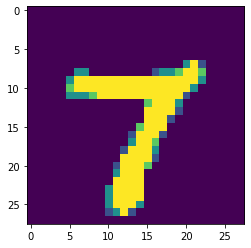

Label = 7


In [ ]:
i = np.random.randint(0,x_train.shape[0])
show_image(x_train[i])
print("Label = " +str(y_train[i]))

# 2o Μέρος: Υλοποίηση KNN

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
## Simple KNN

class KNN:
  def __init__(self,x,y,k,distance="euclidian"):
    self.x = x
    self.y = y
    self.k = k
    self.distance = distance

  
  ## Compute the distance between the two vectors img1 and img2
  # hint: use np.linalg.norm for eucledian
  # hint: use equation given above for cosine
  def get_distance(self,img1,img2):
    if self.distance=='euclidian':
      ##################
      ## Your code below
      dist = np.linalg.norm(img1 - img2)
      ## Your code above
      ##################
    elif self.distance=='cosine':
      ##################
      ## Your code below
      dist = 1 - (np.dot(img1, img2) / (np.linalg.norm(img1) * np.linalg.norm(img2)))
      ## Your code above
      ##################
      pass

    return dist


  ## Given an image as a vector, returns indexes of k nearest neighbors
  def get_knn(self,img):
    distances = list()
    x = self.x
    k = self.k
    
    ##################
    ## Your code below - populate the distances list
    # hint: you can use a for loop
    distances = [self.get_distance(img, oimg) for oimg in x]
    ## Your code above
    ##################

    # Sort distances, and return the indexes of k first elements
    ans_indexes = np.argsort(distances)[:k]
    return ans_indexes


  ## Given an image as a vector, classify it according to KNN
  # hint: we have a list of k labels and want to return the most common one
  def classify(self,img):
    y = self.y
    nn_labels = [y[i] for i in self.get_knn(img)]
    
    ##################
    ## Your code below

    nn_labels_dict = {}
    for i in nn_labels:
      if i in nn_labels_dict:
        nn_labels_dict[i] += 1
      else:
        nn_labels_dict[i] = 1
    
    # old solution

    # maxl = nn_labels[0]
    # for i in nn_labels:
    #   if nn_labels_dict[i] > maxl:
    #     maxl = i
    # prediction = maxl

    # new solution
    max_item = nn_labels[0]
    max_quantity = nn_labels_dict[max_item]

    for i in nn_labels:
      if  nn_labels_dict[i] > max_quantity:
        max_quantity = nn_labels_dict[i]
        max_item = i
      if nn_labels_dict[i] == max_quantity and i > max_item:
        max_quantity = nn_labels_dict[i]
        max_item = i
    prediction = max_item

    ## Your code above
    ###################
    return prediction


knn = KNN(x_train,y_train,k=5,distance='euclidian')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονομένες εικόνες

Input image: 


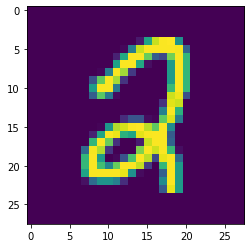

Prediction : 2


In [ ]:
img = x_test[np.random.randint(0,x_test.shape[0])]
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))

## Αξιολόγηση του KNN

In [ ]:
## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
## ..υπομονή μερικά λεπτά
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


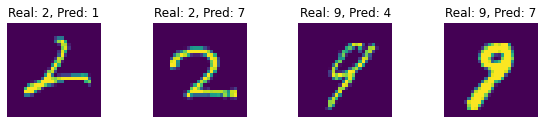

In [ ]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn: [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


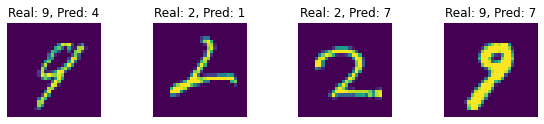

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

In [ ]:
%%time
knn = KNN(x_train,y_train,k=10,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 20.1 s, sys: 49.8 ms, total: 20.1 s
Wall time: 20.2 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 6.44 s, sys: 10 ms, total: 6.45 s
Wall time: 6.47 s


## Σχολιασμός

Αρχικά παρατηρούμε οτι ο KNeighborClassifier του sklearn είναι αρκετά πιο γρήγορος απο τον δικό μας ταξινομητή και αυτό για 100 μόνο δείγματα. Αυτό οφείλεται σε διαφορετική υλοποίηση που μάλλον χρησιμοποιεί καλύτερα τους πόρους του συστήματος. Παρ'όλα αυτά παρατηρούμε πως όποιο k (αριθμός γειτόνων) και να βάλουμε ο χρόνος παραμένει περίπου σταθερός.

# 3ο Μέρος: Naive Bayes

Αρχικά στρογγυλοποιούμε τις τιμές των pixels για να παίρνουν διακριτές τιμές στο $\{0,1\}$

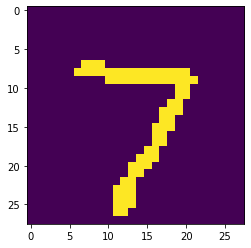

In [ ]:
## Στρογγυλοποίηση:
x_train_r = np.round(x_train)
x_test_r = np.round(x_test)
show_image(x_test_r[0])

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
import math

class NaiveBayes:
  def __init__(self,x,y):
    self.x = x
    self.y = y
    ## pC is a vector with the probability of each class
    self.pC = np.zeros((10,))
    ## pxC is an array with all probabilities p(xi|C)
    self.pxC = np.zeros((x.shape[-1],10))
    self.pxC0 = np.zeros((x.shape[-1],10))

    self.freq = {}
    for i in range(10): self.freq[i] = 0
    for i in y: self.freq[i] += 1

    self.digit_images = {}
    for i in range(10): self.digit_images[i] = []

    ## Compute the probabilities
    self.compute_probabilities()


  def compute_probabilities(self):
    x = self.x
    y = self.y

    ## Compute p(C) for each class
    for label in self.y:
      self.pC[label]+=1
    self.pC = self.pC/self.y.shape[0]

    ## Compute p(xi|C) for each feature xi and class C
    # hint: you can use one or more for loops
    ###################
    ## Your code below
    total_images = len(x)

    for img in range(total_images):
      self.digit_images[y[img]].append(img)
    
    for d in range(10):
      indexes_of_digit = self.digit_images[d]
      for i in indexes_of_digit:
        image = x[i]
        for pix in range(len(image)):
          if image[pix]: self.pxC[pix][d] += 1

      self.pxC[:,d] /= self.freq[d]
      # show_image(self.pxC[:,d])
    self.pxC0 = 1 - self.pxC
    ## Your code above
    ##################

  def predict(self,x):
    ## ~Probability of x belonging to each class
    ## (not actucal probability since we ignore denominator)
 
    pcX = np.ones((10,))
    for digit in range(10):   # for every digit
      # hint: We have probabilities p({x_j=1}|i) in self.pxC
      # We also need p({x_j=0}|i) for computing p(x|i)
      #################
      ## Your code below

      # prior = math.log(self.pC[digit],10)
      prior = self.pC[digit]
      for pixel in range(len(x)):
        if x[pixel]: prior *= self.pxC[pixel][digit]   # if pixel is 1
        else: prior *=  self.pxC0[pixel][digit]  # if pixel is 0
      pcX[digit] = prior
      # print(pcX)
      ## Your code above
      ##################
    return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

precision : 0.8400974025974026
recall : 0.850108225108225
f1 : 0.8261529454950507
accuracy : 0.85
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  1  0]
 [ 0 13  0  1  0  0  0  0  0  0]
 [ 0  0  7  1  0  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 1  0  0  0 12  0  0  0  0  1]
 [ 0  0  0  2  1  4  0  0  0  0]
 [ 0  0  2  0  0  0  8  0  0  0]
 [ 0  0  1  0  0  0  0 13  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  1  9]]
Some images with wrong predictions


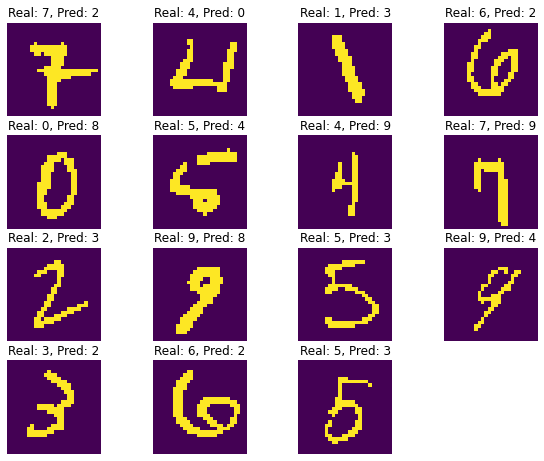

In [ ]:
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds, x_test_r[:100])
eval.get_evaluation_report()

## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το SKLearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή: [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision : 0.5992985558502799
recall : 0.5716774891774892
f1 : 0.5081873844349185
accuracy : 0.6
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  0  1]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  2  0  0  1]
 [ 0  0  1  3  0  0  1  0  5  1]
 [ 1  1  0  0  4  0  0  0  0  8]
 [ 2  0  0  0  1  0  0  0  3  1]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  8  0  6]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


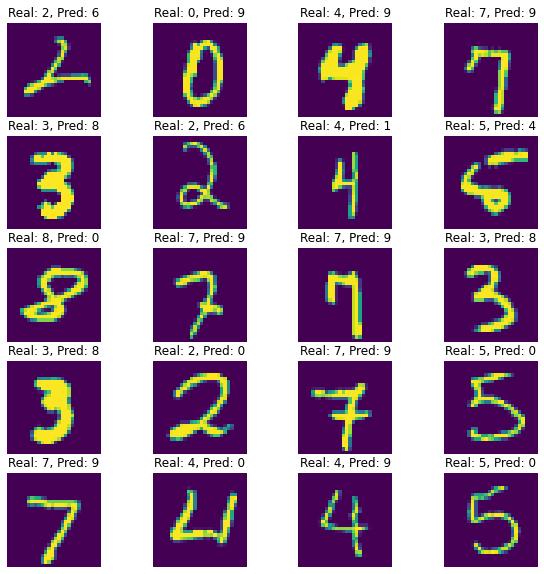

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred, x_test[:100])
eval.get_evaluation_report()

## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Για την έτοιμη υλοποίηση του sklearn δοκιμάστε και το σύνολο x_train_r όπου είναι στρογγυλοποιήμενα τα pixels και το σύνολο x_train οπου παίρνουν συνεχείς τιμές. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 4.95 s, sys: 990 µs, total: 4.95 s
Wall time: 4.97 s


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 294 ms, sys: 1.97 ms, total: 296 ms
Wall time: 297 ms


## Σχολιασμός
Παρατηρώ ότι η ΝΒClassifier της sklearn τρέχει πολύ πιο γρήγορα απο τον κώδικα μου. Παρ' όλα αυτά έχει κατά πολύ μικρότερο accuracy. Αυτό οφείλεται στο ότι η γκαουσιανή εκδοχή υποθέτει ότι τα δεδομένα ακολουθούν συνεχή κανονική κατανομή και δεν αξιοποιεί επαρκώς τη δίτιμη εκδοχή των Pixels, όπως κάνω εγώ.

#4ο Μέρος: Multi-Layer Perceptron 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολύεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως sckit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης sckit-learn. 

Στο παρακάτω κελί κώδικα σας δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά- κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει την ανανέωση των βαρών του δικτύου και συνεπώς στην σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα συνεπώς κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης συνεπώς  επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητοί να διατηρεί 2 τους δυο πίνακες με τα βάρη οι όποιο στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται επιθυμητή λειτουργικότητα. 

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        """
        Weight Initialization
        """
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot
        output = np.dot(input,self.weights) + self.biases
        ## Your code above
        ##################
        return output
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματα του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [ ]:
def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 10 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου (εδώ 28*28). Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        '''
        Κατασκευή του MLP. Τα επίπεδα και το μέγεθός τους ορίζεται από την μεταβλήτη shape, ενώ
        το μέγεθος της εισόδου ορίζεται από την μεταβλήτη input_dim
        '''
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1],shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i],shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            activations.append(l.forward(input))
            # είσοδος η έξοδος του άλλου
            input = activations[-1]
            ## Your code above
            ##################
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis=-1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
        logits = layer_activations[-1]
        
        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
        
        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 24
Train accuracy: 0.73315
Val accuracy: 0.7345


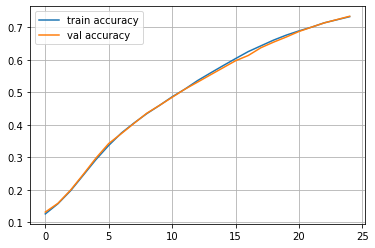

precision : 0.7368412625596275
recall : 0.7270829966883557
f1 : 0.7145254534919087
accuracy : 0.7345
Confusion matrix: 
[[ 934    0   16    3    0    6   14    1    5    1]
 [   0 1098    3    2    0    0   10    0   20    2]
 [  53   80  673   27   38    1   92   18   33   17]
 [  47   14   73  726    4    2   16   35   62   31]
 [   5    8    4    1  727    1   26    5   12  193]
 [ 130   59   49  123   65  227   62   36  118   23]
 [  70   15    6    0   11    3  852    1    0    0]
 [  13   47    5    0    9    0    8  783   45  118]
 [  33   46   41   95   20   45   32   55  573   34]
 [  14    9    3   12  131    5    6   49   28  752]]
Some images with wrong predictions


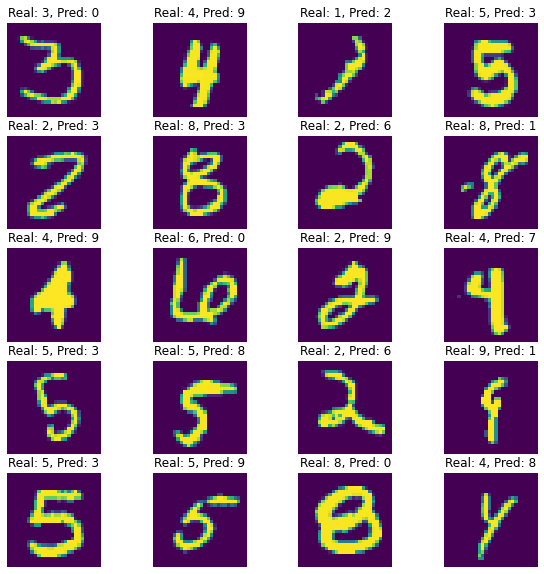

In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 200, 100, 10], 28*28)

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(25):
    network.fit(x_train,y_train)
    
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


precision : 0.9701475370992542
recall : 0.9700654974158198
f1 : 0.9700817543705007
accuracy : 0.9704
Confusion matrix: 
[[ 964    0    1    0    1    3    5    1    3    2]
 [   0 1123    4    0    0    1    4    1    2    0]
 [   2    3 1003    7    1    0    4    7    5    0]
 [   2    0    7  979    1    9    0    6    6    0]
 [   1    0    0    1  946    1    5    3    0   25]
 [   3    1    1    8    1  861    9    0    6    2]
 [   5    3    3    1    5    4  934    1    2    0]
 [   0    3   11    2    1    0    0  996    2   13]
 [   6    0    4    7    5    8   10    5  923    6]
 [   4    3    1    7   11    2    0    1    5  975]]
Some images with wrong predictions


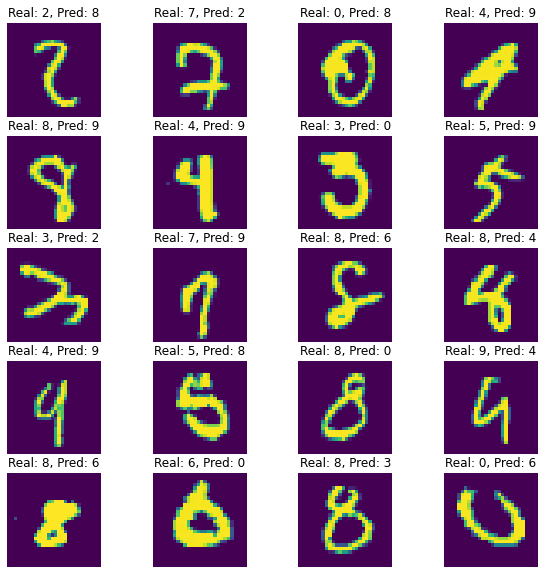

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 25 
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσμα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 

In [ ]:
%%time
network = MLP([100, 200, 100, 10], 28*28)

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(25):
    network.fit(x_train,y_train)
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred, x_test)

CPU times: user 47.5 s, sys: 7.54 s, total: 55.1 s
Wall time: 27.9 s


In [ ]:
%%time
epochs = 25 
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)

CPU times: user 35.6 s, sys: 15.1 s, total: 50.7 s
Wall time: 25.7 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Σχολιασμός

Πατηρώ πως η έτοιμη κλάση είναι πιο γρήγορη και ότι αυξάνωντας τις εποχές (μέχρι ένα σημείο) αυξάνεται και το accuracy.

# Αξιολόγηση- Συμπεράσματα 

Τα αποτελέσματα τους είναι τα εξής:

|                                 | precission         | recall             | f1                 | accuracy | time  |
|---------------------------------|--------------------|--------------------|--------------------|----------|-------|
| KNN                             | 0.9749019607843138 | 0.9568181818181818 | 0.962567733990148  | 0.96     | 20.2s |
| KNN sklearn                     | 0.9749019607843138 | 0.9568181818181818 | 0.962567733990148  | 0.96     | 6.47s |
| Naive Bayes                     | 0.8400974025974026 | 0.850108225108225  | 0.8261529454950507 | 0.85     | 4.97s |
| Naive Bayes sklearn             | 0.5992985558502799 | 0.5716774891774892 | 0.5081873844349185 | 0.6      | 297ms |
| Multi- Layer Perceptron         | 0.7368412625596275 | 0.7270829966883557 | 0.7145254534919087 | 0.7345   | 27.9s |
| Multi- Layer Perceptron sklearn | 0.9701475370992542 | 0.9700654974158198 | 0.9700817543705007 | 0.9704   | 25.7s |

Παρατηρώ ότι ο MLP παίρνει περισσότερο χρόνο αλλά έχει καλύτερα αποτελέσματα ενώ ο naive Bayes είναι ο γρηγορότερος όλων με τα χειρότερα αποτελέσματα. Τέλος ο ΚΝΝ είναι ο μέσος των δύο αυτών τεχνικών έχοντας αρκετά καλά αποτελέσματα και ταχύτητα
